In [1]:
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('AggregatedData.csv')

In [2]:
cols = ['Transaction Date','No Of Withdrawals']
df = df[cols]

In [3]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
print(df['Transaction Date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
11584   2017-09-29
11585   2017-09-29
11586   2017-09-29
11587   2017-09-29
11588   2017-09-29
Name: Transaction Date, Length: 11589, dtype: datetime64[ns]


In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


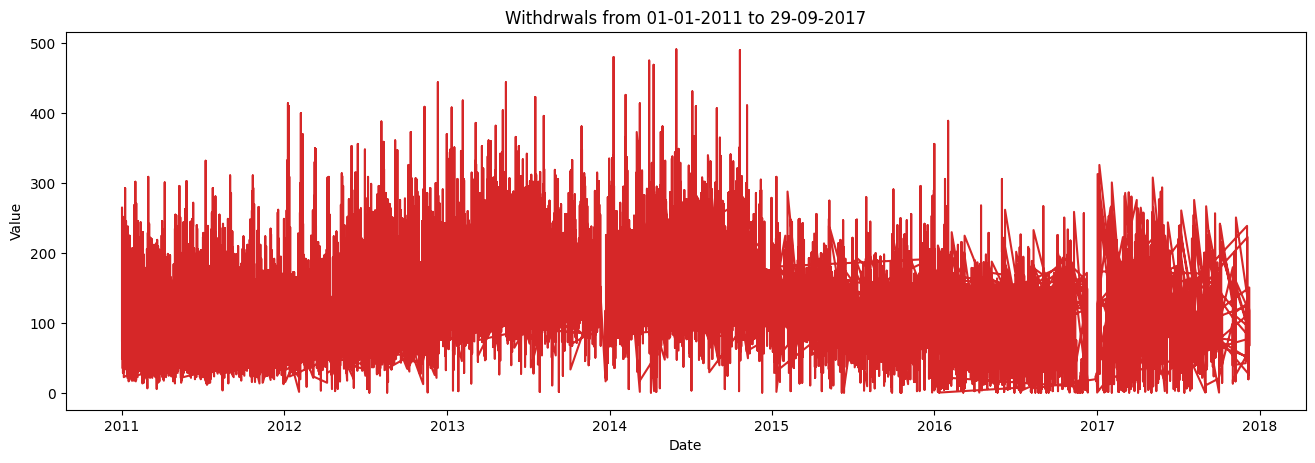

In [5]:
plot_df(df, x=df['Transaction Date'], y=df['No Of Withdrawals'], title='Withdrwals from 01-01-2011 to 29-09-2017')    


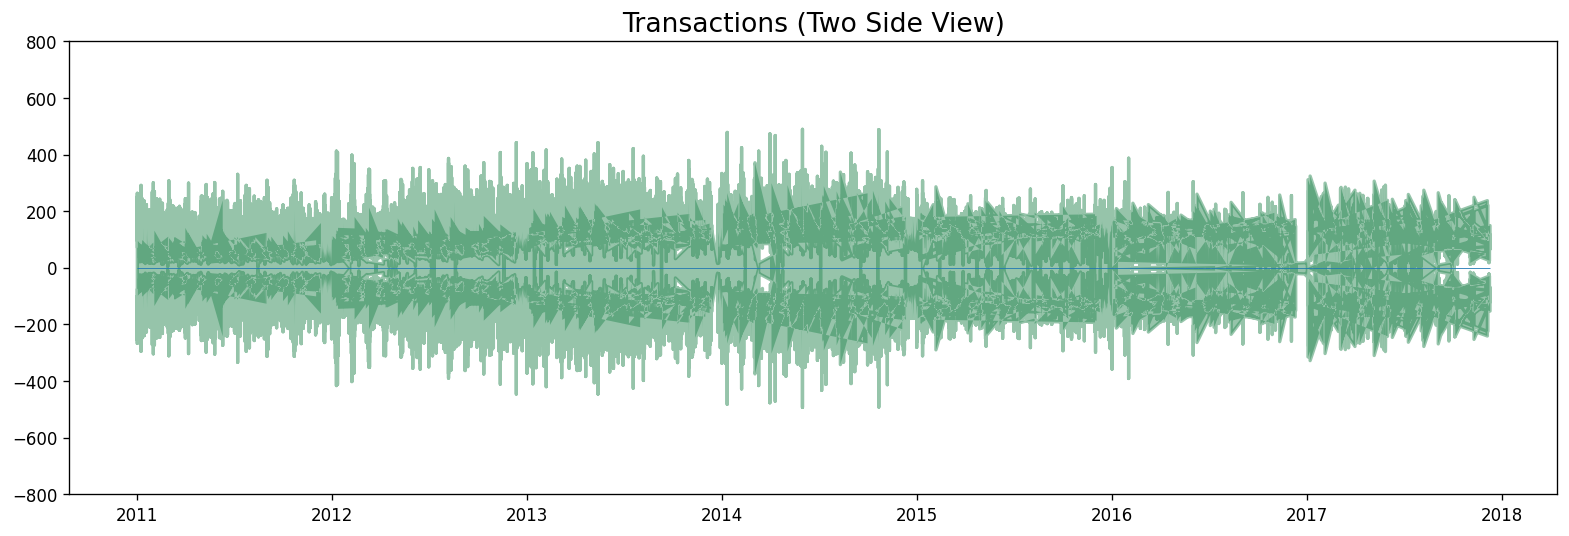

In [6]:
x = df['Transaction Date'].values
y1 = df['No Of Withdrawals'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Transactions (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Transaction Date']), xmax=np.max(df['Transaction Date']), linewidth=.5)
plt.show()

In [7]:
# Prepare data
df['year'] = [d.year for d in df['Transaction Date']]
df['month'] = [d.strftime('%b') for d in df['Transaction Date']]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    print(i,y)
    if i > 0:        
        plt.plot('month', 'No Of Withdrawals', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'No Of Withdrawals'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

plt.savefig('my_fig.png', dpi=96)


0 2011
1 2012
2 2013
3 2014
4 2015
5 2016
6 2017


ValueError: Image size of 160341x4279 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1280x960 with 1 Axes>

<Figure size 432x288 with 0 Axes>

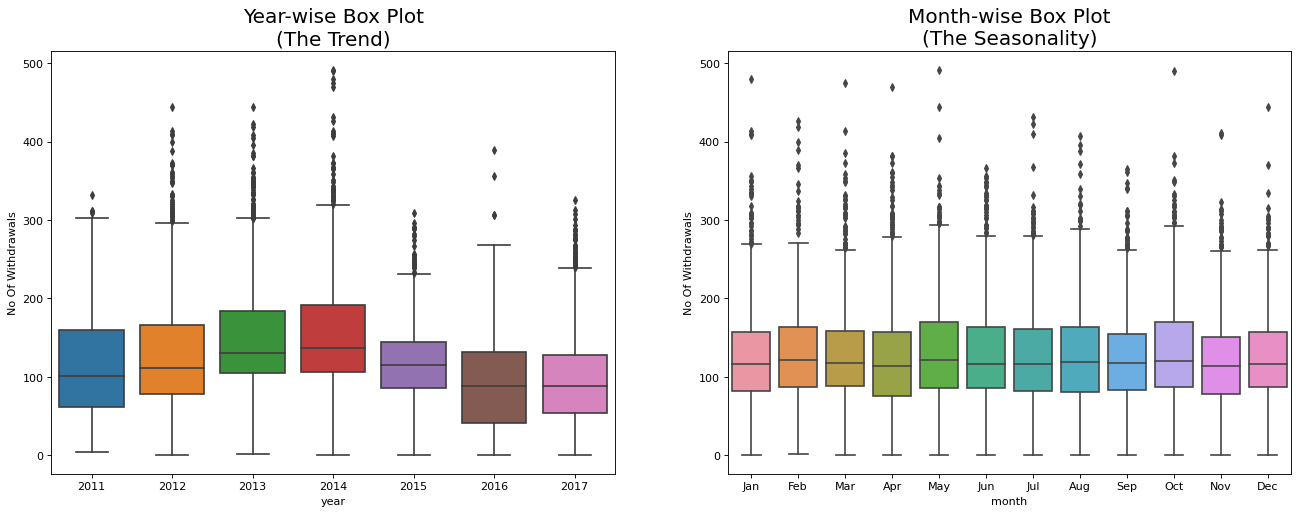

In [19]:
# Prepare data
df['year'] = [d.year for d in df['Transaction Date']]
df['month'] = [d.strftime('%b') for d in df['Transaction Date']]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='No Of Withdrawals', data=df, ax=axes[0])
sns.boxplot(x='month', y='No Of Withdrawals', data=df.loc[~df.year.isin([1991, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [36]:
#new Approch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
df = pd.read_csv('AggregatedData.csv')
df = df[cols]
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%Y-%m-%d')


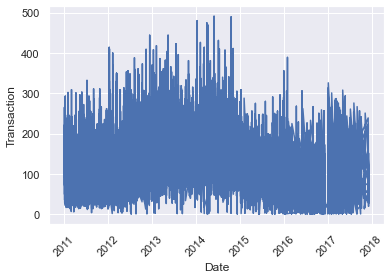

In [37]:
plt.ylabel('Transaction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df['Transaction Date'], df['No Of Withdrawals'] )


In [40]:
df.head()

,Transaction Date,No Of Withdrawals
0,2011-01-01,50
1,2011-01-01,253
2,2011-01-01,98
3,2011-01-01,265
4,2011-01-01,74


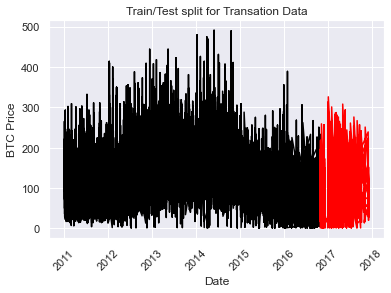

In [41]:
#test train split
df.index = pd.to_datetime(df['Transaction Date'], format='%Y-%m-%d')
del df['Transaction Date']

train = df[df.index < pd.to_datetime("2016-10-30", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2016-10-30", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Transation Data")
plt.show()

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [44]:
y = train['No Of Withdrawals']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so w

In [45]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


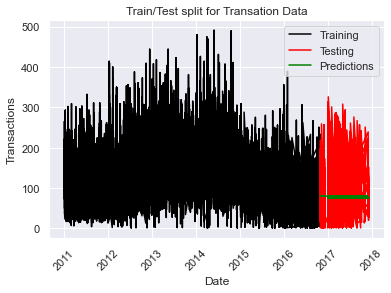

In [50]:
plt.plot(train, color = "black",label = 'Training')
plt.plot(test, color = "red",label = 'Testing')
plt.ylabel('Transactions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Transation Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["No Of Withdrawals"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  64.77853386890533
